<a href="https://colab.research.google.com/github/felipesayegg/LSTM_FAT_PE-AS/blob/main/Sprint3_LSTM_(Long_Short_Term_Memory).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 Projeto de Previsão de Vendas com LSTM - Sohipren

## 👤 Autoria
**Felipe Gonçalves Cunha-Seg**  
**FIAP - Projeto de Inteligência Artificial Aplicada**

---

## 🔎  Descrição do Problema de Negócio

A Sohipren busca melhorar sua capacidade de previsão de vendas para otimizar o planejamento de produção, estoque e estratégias comerciais.  
O objetivo deste projeto é desenvolver um modelo preditivo baseado em redes neurais recorrentes do tipo **LSTM (Long Short-Term Memory)** capaz de prever o volume de vendas futuras com base em padrões históricos e variáveis de contexto.

---


## 📦 Bibliotecas Utilizadas

Antes de iniciar a análise, faremos a importação das bibliotecas principais utilizadas neste projeto:

---




## 🧾  Coleta e Análise de Dados

Serão utilizados os dados de vendas históricas da empresa, organizados por data e valores totais.  
A análise exploratória identificará tendências, sazonalidades, outliers e correlações entre variáveis como:
- Estação do ano  
- Localização geográfica (UF)  
- Tipo de produto  
- Fatores macroeconômicos (inflação, câmbio)

---

## ⚙️ Pré-processamento dos Dados

- Conversão de datas em índices temporais  
- Agrupamento por mês (ou outro período relevante)  
- Aplicação de **média móvel** para suavização da série  
- Normalização das variáveis  
- Criação das janelas temporais (sequências para entrada no modelo LSTM)  
- Separação entre conjunto de treino e teste respeitando a ordem temporal

---

## 🧠  Modelagem com LSTM

- Construção de uma rede neural recorrente com camadas LSTM  
- Ajuste de hiperparâmetros (número de neurônios, camadas, epochs)  
- Função de ativação, perda e otimizador  
- Treinamento com validação cruzada (opcional) ou hold-out temporal

---

## 📊  Validação do Modelo

Avaliação com métricas específicas para séries temporais:
- **RMSE** (Root Mean Squared Error)  
- **MAE** (Mean Absolute Error)  
- **MAPE** (Mean Absolute Percentage Error)

Visualizações comparando previsões e valores reais.

---

## 📈 . Apresentação dos Resultados

- Gráficos de previsão futura  
- Análise dos erros e acertos  
- Aplicações práticas para a gestão de vendas e tomada de decisão  
- Recomendação de uso contínuo do modelo

---

## 💡 Considerações Finais

- Limitações do modelo atual  
- Propostas de melhoria futura (ex: uso de dados externos, variáveis climáticas, feedback da equipe comercial, etc.)


#🔎 1. Descrição do Problema de Negócio

A Sohipren, como indústria do setor de componentes e peças, enfrenta desafios importantes relacionados à **gestão de estoque, produção e faturamento**. Um dos principais problemas enfrentados pela empresa é a **dificuldade de prever com precisão a demanda futura**, tanto em termos de **quantidade de peças** quanto de **valor financeiro total (faturamento)**.

Atualmente, a tomada de decisão ocorre de forma bastante reativa. A produção de peças é feita muitas vezes com base em estimativas ou demandas pontuais, o que resulta em **excessos ou faltas no estoque**, desperdício de insumos, retrabalho e, em muitos casos, peças produzidas sem aproveitamento — o que gera **perda de tempo e recursos financeiros**.

Esse cenário prejudica o planejamento da empresa em diversos níveis:
- ❌ Produção desalinhada com a demanda real;
- ❌ Estoque excessivo de peças sem giro;
- ❌ Dificuldade de estimar o faturamento nos próximos meses;
- ❌ Baixa previsibilidade no fluxo de caixa e compras de insumos.

---

### 🎯 Objetivo da Solução

Este projeto tem como objetivo o desenvolvimento de **dois modelos preditivos baseados em redes neurais recorrentes LSTM (Long Short-Term Memory)** para atacar diretamente essa dor da empresa:

- **Modelo 1**: prever a **quantidade futura de peças** vendidas (volume físico);
- **Modelo 2**: prever o **faturamento mensal** com base nos dados históricos (volume financeiro).

Ambos os modelos serão treinados com dados históricos da Sohipren, e utilizarão uma abordagem de séries temporais para capturar **tendências, sazonalidades e comportamentos repetitivos** ao longo do tempo. Isso permitirá criar uma ferramenta de apoio à decisão capaz de antecipar cenários futuros e guiar:

- A **produção alinhada à demanda real**;
- A **compra de insumos no tempo certo**;
- A **redução de desperdícios e retrabalhos**;
- A **gestão financeira com mais previsibilidade**.

---

### 🛠️ Resumo Técnico da Solução

A metodologia aplicada se baseará em uma pipeline completa, desde a coleta e pré-processamento dos dados até a modelagem e validação de desempenho dos modelos LSTM. O processo inclui:

- Suavização de outliers com **média móvel**;
- Criação de **janelas temporais de entrada** para alimentar as redes neurais;
- Separação temporal entre treino e teste;
- Avaliação com métricas robustas (RMSE, MAE, MAPE);
- Visualização gráfica dos resultados preditivos para fácil interpretação.

Com isso, esperamos entregar uma solução prática e aplicável que ajude a Sohipren a se antecipar ao mercado, tomar decisões mais estratégicas e melhorar seu desempenho operacional.


#  2. 📦 Bibliotecas Utilizadas

In [1]:
# ==========================================
# 🧰 Bibliotecas para Manipulação de Dados
# ==========================================
import pandas as pd           # Leitura, organização e manipulação de dados tabulares (DataFrames)
import numpy as np            # Operações matemáticas e vetoriais (arrays e matrizes)

# ==========================================
# 📈 Visualização de Dados
# ==========================================
import matplotlib.pyplot as plt   # Criação de gráficos (linha, barras, dispersão, etc.)
import seaborn as sns            # Biblioteca de visualização mais bonita e prática para análise exploratória

# Estilo de gráficos
plt.style.use('ggplot')  # Alternativa visual bonita e nativa
import warnings
warnings.filterwarnings('ignore')  # Ignora avisos para deixar a saída do notebook mais limpa

# ==========================================
# ⚙️ Pré-processamento
# ==========================================
from sklearn.preprocessing import MinMaxScaler  # Normalização de dados para redes neurais (escala 0 a 1)

# ==========================================
# 🧠 Modelagem com Redes Neurais (LSTM)
# ==========================================
from keras.models import Sequential        # Classe base para criar modelos neurais sequenciais
from keras.layers import LSTM, Dense, Dropout  # Camadas específicas para redes neurais (LSTM, densas e dropout)

# ==========================================
# 📏 Avaliação de Desempenho
# ==========================================
from sklearn.metrics import mean_squared_error, mean_absolute_error  # Métricas para avaliar a previsão

# MAPE pode ser calculado manualmente:
def mean_absolute_percentage_error(y_true, y_pred):  # MAPE personalizado
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


# 3. Coleta e Análise de Dados

In [2]:
# Conectar o Colab ao seu Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Caminho do arquivo no drive
caminho = "/content/drive/MyDrive/BASE DE DADOS - PROJETO FIAP.xlsx"

In [4]:
# colocar a panilha em uam variavel via pandas

df = pd.read_excel(caminho)

In [5]:
# ver as ultimas
df.tail()

,CÓD. EMPRESA,RAZÃO SOCIAL EMPRESA,NF/CT-E,CFOP,EMISSÃO,RAZÃO SOCIAL CLIENTE,UF,CÓD.MAT.,DESCRIÇÃO MATERIAL,UNID. MEDIDA,QUANTIDADE,VALOR TOTAL
39904,2,SOHIPREN DO BRASIL COMERCIAL E INDUSTRIAL LTDA,2211.0,5102.0,2025-02-28,FOCO DISTRIBUIDORA DE PECAS AGRICOLAS LTDA,GO,5.1301.0565017.0,BOMBA APLICACAO CNH A-017 GIRO D (82988360),UN,1.0,2700.0
39905,2,SOHIPREN DO BRASIL COMERCIAL E INDUSTRIAL LTDA,2210.0,5102.0,2025-02-28,AGRI FORD PECAS PARA TRATORES & IMPLEM AGRICOL...,GO,5.1301.0565035.0,BOMBA APLICACION CNH A-024 (73337533) GIRO D,UN,1.0,2650.0
39906,2,SOHIPREN DO BRASIL COMERCIAL E INDUSTRIAL LTDA,2206.0,6102.0,2025-02-28,A. M. COMPANY LTDA,PA,5.1621.0630004.1,MLP 80 C3.C2.P5,UN,1.0,770.0
39907,2,SOHIPREN DO BRASIL COMERCIAL E INDUSTRIAL LTDA,2209.0,5102.0,2025-02-28,RC PARTS PECAS E IMPLEMENTOS AGRICOLAS LTDA,GO,6.0530.0623021.0,CPO.VM100 A-000-000-1-A-XX-1-A-000,UN,1.0,620.0
39908,_x000C_,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.head(10) # ver as 10 primeiras

,CÓD. EMPRESA,RAZÃO SOCIAL EMPRESA,NF/CT-E,CFOP,EMISSÃO,RAZÃO SOCIAL CLIENTE,UF,CÓD.MAT.,DESCRIÇÃO MATERIAL,UNID. MEDIDA,QUANTIDADE,VALOR TOTAL
0,1,SOHIPREN DO BRASIL COMERCIAL E INDUSTRIAL LTDA.,603.0,6101.0,2016-01-04,POCHINI FABRICACAO E VENDA DE EQUIPTOS INDUSTR...,MG,5.0220.L020110.0,"BOD 22,5 E.C.G3/16.G3.L",UN,1.0,632.0
1,1,SOHIPREN DO BRASIL COMERCIAL E INDUSTRIAL LTDA.,604.0,5101.0,2016-01-04,FABRICA DE MAQUINAS COPLING LTDA,SP,5.0505.0504066.0,MC1 50 201.1.21.86.63,UN,1.0,562.0
2,1,SOHIPREN DO BRASIL COMERCIAL E INDUSTRIAL LTDA.,605.0,5101.0,2016-01-05,CEC HIDRAULICA COMERCIO E REPRESENTACAO LTDA,SP,5.0201.0540607.0,"BOD 2,5 C11.C.C3.L",UN,1.0,237.0
3,1,SOHIPREN DO BRASIL COMERCIAL E INDUSTRIAL LTDA.,610.0,6101.0,2016-01-05,HIDROFORT TECNOMETAL DO BRASIL LTDA,RS,5.0205.L019630.0,BOI 8 B1.P1.C3.L,UN,2.0,570.0
4,1,SOHIPREN DO BRASIL COMERCIAL E INDUSTRIAL LTDA.,609.0,5101.0,2016-01-05,BRS AUTOMACAO INDUSTRIAL LTDA,SP,5.0205.L020070.0,BOD 8 C11.C.C3.T - 05 BAR,UN,1.0,329.0
5,1,SOHIPREN DO BRASIL COMERCIAL E INDUSTRIAL LTDA.,608.0,5101.0,2016-01-05,DANFER COMERCIO E EQUIPAMENTOS LTDA,SP,5.0220.L019920.0,BOD 4 B1.P1.A/4 A.L,UN,1.0,564.0
6,1,SOHIPREN DO BRASIL COMERCIAL E INDUSTRIAL LTDA.,606.0,6101.0,2016-01-05,JVA COM E SERV DE MANUT REPARACAO E HIDR P/ VE...,SE,5.0503.0502017.0,MC1 32 201.2.37.69.61,UN,1.0,543.0
7,1,SOHIPREN DO BRASIL COMERCIAL E INDUSTRIAL LTDA.,607.0,5101.0,2016-01-05,AGROMERICA AGROMETALURGICA AMERICA LTDA,SP,5.1621.0670013.0,MOTOR ORBITAL,UN,4.0,4000.0
8,1,SOHIPREN DO BRASIL COMERCIAL E INDUSTRIAL LTDA.,610.0,6102.0,2016-01-05,HIDROFORT TECNOMETAL DO BRASIL LTDA,RS,6.5061.L620001.1,BHRS1-100-B14-Y4,UN,3.0,1749.0
9,1,SOHIPREN DO BRASIL COMERCIAL E INDUSTRIAL LTDA.,613.0,5101.0,2016-01-06,ENGEHIDRO EQUIPAMENTOS INDUSTRIAIS LTDA,SP,5.0202.L020120.0,BOD 4 A6.B.C3.L,UN,1.0,289.0


In [7]:
# 📐 Ver o formato do DataFrame
print("Dimensões da base:", df.shape)

Dimensões da base: (39909, 12)


In [8]:
# ver os tipos de dados


print("Tipos de dados:", df.dtypes)

Tipos de dados: CÓD. EMPRESA                    object
RAZÃO SOCIAL EMPRESA            object
NF/CT-E                        float64
CFOP                           float64
EMISSÃO                 datetime64[ns]
RAZÃO SOCIAL CLIENTE            object
UF                              object
CÓD.MAT.                        object
DESCRIÇÃO MATERIAL              object
UNID. MEDIDA                    object
QUANTIDADE                     float64
VALOR TOTAL                    float64
dtype: object


In [9]:
# Ver se tem valores nulos usando uma função isnull.sum

print("Valores nulos:")
print(df.isnull().sum())

Valores nulos:
CÓD. EMPRESA            0
RAZÃO SOCIAL EMPRESA    1
NF/CT-E                 1
CFOP                    1
EMISSÃO                 1
RAZÃO SOCIAL CLIENTE    1
UF                      1
CÓD.MAT.                1
DESCRIÇÃO MATERIAL      1
UNID. MEDIDA            1
QUANTIDADE              1
VALOR TOTAL             1
dtype: int64


In [10]:
# Estatistica descritiva para entender como os dados estão se comportando


df.describe()

,NF/CT-E,CFOP,EMISSÃO,QUANTIDADE,VALOR TOTAL
count,39908.000000,39908.000000,39908,39908.000000,39908.000000
mean,11922.769019,5775.013381,2021-01-09 08:51:19.322441472,126.867766,2511.259423
min,1.000000,5101.000000,2016-01-04 00:00:00,0.000000,0.000000
25%,5571.750000,5101.000000,2018-10-11 00:00:00,1.000000,555.000000
50%,12231.500000,5401.000000,2021-05-07 00:00:00,2.000000,1090.000000
75%,17988.000000,6101.000000,2023-04-17 00:00:00,5.000000,2360.000000
max,24099.000000,7501.000000,2025-02-28 00:00:00,26000.000000,164400.000000
std,7091.079687,742.073827,NaN,996.455152,5411.945718


### 📊 Análise Descritiva Inicial

Através da função `df.describe()`, foi possível observar o comportamento estatístico das principais variáveis numéricas da base:

- **Quantidade**:
  - Varia de 0 até 28.000 peças em um único registro;
  - Média de ~129 unidades por nota;
  - Desvio padrão alto (968), indicando alta variabilidade entre as notas;
  - Algumas notas possuem `quantidade = 0`, o que pode ser ruído ou erro de lançamento.

- **Valor Total**:
  - Varia de 0 até R$ 184.400,00 por nota;
  - Média de R$ 2.511,00 por venda;
  - Também apresenta desvio padrão alto (5.411), sugerindo necessidade de suavização posterior.

⚠️ Variáveis como `NF/CT-E`, `CFOP` e `RAZÃO SOCIAL` são campos administrativos e **não serão utilizados como entrada no modelo LSTM**, pois não representam variações temporais diretamente.  
O foco do modelo será prever **`QUANTIDADE` e `VALOR TOTAL` ao longo do tempo**, com base em dados agregados mensalmente.


### 📈 Interpretação dos Percentis no `df.describe()`

A função `df.describe()` nos fornece, além da média e do desvio padrão, **estatísticas descritivas baseadas em percentis**, que ajudam a entender como os dados estão distribuídos. Vamos explicar cada um:

---

#### 📌 **25% (Primeiro Quartil / Q1)**
- Representa o valor abaixo do qual estão os **25% menores valores da coluna**.
- Por exemplo, para `VALOR TOTAL`, o Q1 ≈ 1.000 significa que **25% das vendas tiveram valor abaixo de R$ 1.000,00**.
- Isso indica uma grande quantidade de vendas de pequeno porte (baixo valor unitário ou pouca quantidade).

---

#### 📌 **50% (Mediana / Q2)**
- Representa o valor central: **metade das observações estão abaixo e metade acima**.
- É muito útil quando os dados estão enviesados ou têm outliers.
- Exemplo: a mediana da `QUANTIDADE` foi 2 unidades → significa que **em metade das vendas, foram vendidas até 2 peças**, mesmo com o máximo sendo 28.000.
- Isso mostra um **grande desequilíbrio** nos dados — muitos valores baixos e poucos muito altos (distribuição assimétrica).

---

#### 📌 **75% (Terceiro Quartil / Q3)**
- Indica que **75% das vendas ficaram abaixo desse valor**.
- Para `VALOR TOTAL`, Q3 ≈ 2.380 → mostra que **apenas 25% das vendas superaram esse valor**.
- Ou seja: a maioria das vendas tem valores relativamente baixos, com **algumas poucas notas muito altas** puxando a média para cima.

---

### 🎯 Conclusão da Análise Percentílica

- Os percentis mostram uma **distribuição assimétrica**, com forte presença de **valores pequenos** e **outliers elevados**.
- Isso justifica:
  - Aplicar **média móvel** para suavizar ruídos nas séries temporais;
  - Considerar uso da **mediana como métrica robusta** na análise descritiva;
  - Cuidado ao treinar o modelo: os outliers podem influenciar negativamente a performance se não forem tratados.

---

Essas observações reforçam a importância de **suavizar a série com média móvel** antes de aplicar o LSTM, garantindo que o modelo aprenda os padrões reais e não os ruídos extremos.


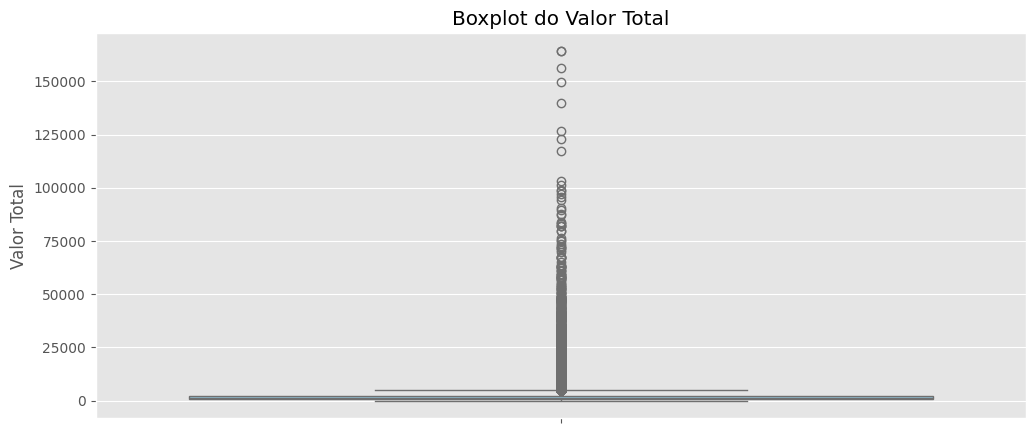

In [11]:
# Cria uma nova figura (área de plotagem) com tamanho 12 de largura por 5 de altura
plt.figure(figsize=(12, 5))

# Plota um boxplot da coluna 'VALOR TOTAL' do DataFrame df
# Esse gráfico mostra a distribuição dos dados, incluindo a mediana, quartis e possíveis outliers
# A cor da caixa é definida como azul claro ('skyblue') para melhor visualização
sns.boxplot(y=df["VALOR TOTAL"], color='skyblue')

# Define o título do gráfico
plt.title("Boxplot do Valor Total")

# Define o nome do eixo Y
plt.ylabel("Valor Total")

# Exibe o gráfico na tela
plt.show()

### 💬 Interpretação do Gráfico - VALOR TOTAL

- O gráfico mostra que a maioria das vendas está abaixo de R$ 3.000,00.
- Existe uma cauda longa de valores altos, indicando **outliers relevantes** (notas com valores muito elevados).
- Esses outliers podem distorcer a média — por isso usaremos suavização com média móvel na modelagem.


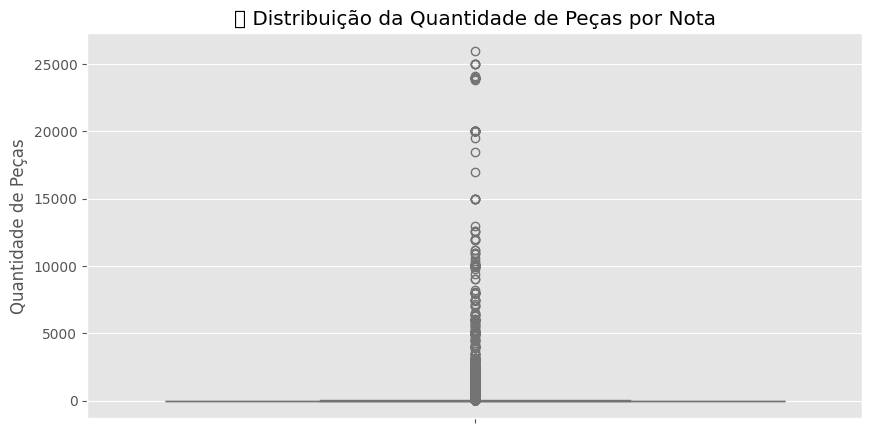

In [12]:
# =============================
# 🎨 Análise Visual: QUANTIDADE
# =============================
plt.figure(figsize=(10, 5))
sns.boxplot(y=df['QUANTIDADE'], color='lightgreen')
plt.title('📦 Distribuição da Quantidade de Peças por Nota')
plt.ylabel('Quantidade de Peças')
plt.show()

### 💬 Interpretação do Gráfico - QUANTIDADE

- Mais de 75% das vendas envolvem até 4 unidades por nota.
- Há **valores extremos** que ultrapassam 10.000 peças em uma única venda — são os outliers que dificultam o aprendizado do modelo.
- Isso mostra que a empresa tem um padrão de venda pequeno e frequente, com **eventuais vendas muito grandes**.

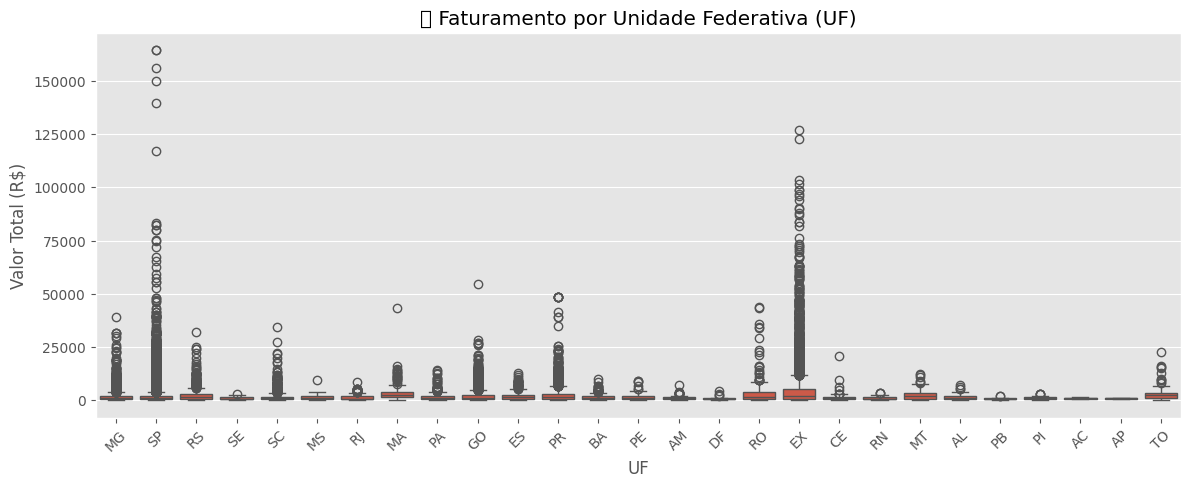

In [13]:
# =============================
# 🎨 Análise Visual: Faturamento por UF
# =============================

# Cria uma nova figura para o gráfico, com largura 14 e altura 5
plt.figure(figsize=(14, 5))

# Plota um boxplot comparando o 'VALOR TOTAL' entre os diferentes estados (UFs)
# 'x' representa a coluna 'UF' (Unidade Federativa)
# 'y' representa os valores de faturamento ('VALOR TOTAL')
# 'data=df' indica que os dados estão no DataFrame chamado df
sns.boxplot(x='UF', y='VALOR TOTAL', data=df)

# Define o título do gráfico
plt.title('💰 Faturamento por Unidade Federativa (UF)')

# Define o nome do eixo Y
plt.ylabel('Valor Total (R$)')

# Gira os nomes das UFs no eixo X em 45 graus para melhor visualização (evita sobreposição de texto)
plt.xticks(rotation=45)

# Exibe o gráfico
plt.show()


### 💬 Interpretação do Gráfico - UF x Faturamento

- Estados como SP, MG e RS concentram a maior parte das vendas com maior faturamento.
- Alguns estados apresentam distribuição mais homogênea, enquanto outros têm outliers muito altos.
- Isso pode ser útil futuramente se quisermos treinar modelos regionais ou adicionar UF como variável categórica.


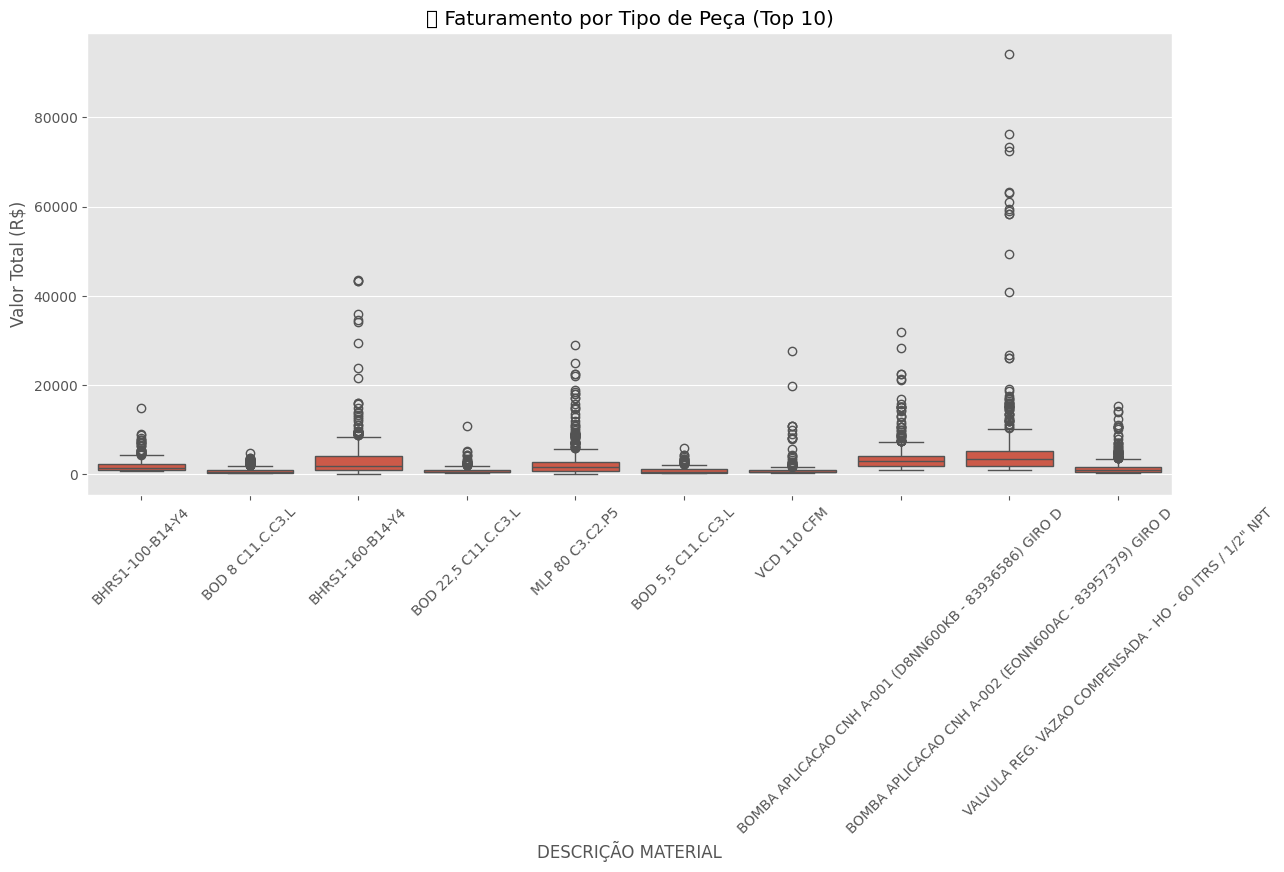

In [14]:
# =============================
# 🎨 Análise Visual: Top Produtos
# =============================

# Filtra os 10 materiais mais vendidos com base na frequência da coluna 'DESCRIÇÃO MATERIAL'
# .value_counts() conta quantas vezes cada material aparece
# .head(10) pega os 10 mais frequentes
# .index retorna apenas os nomes desses materiais
top_materiais = df['DESCRIÇÃO MATERIAL'].value_counts().head(10).index

# Cria um novo DataFrame apenas com as linhas que têm um dos 10 materiais mais vendidos
df_top = df[df['DESCRIÇÃO MATERIAL'].isin(top_materiais)]

# Cria uma nova figura para o gráfico, com tamanho 14x6
plt.figure(figsize=(14, 6))

# Plota um boxplot para mostrar a distribuição do faturamento por tipo de peça (somente os top 10)
# 'x' → os nomes dos materiais
# 'y' → o valor total de cada venda
# 'data=df_top' → diz que os dados vêm do DataFrame filtrado com os top 10
sns.boxplot(x='DESCRIÇÃO MATERIAL', y='VALOR TOTAL', data=df_top)

# Define o título do gráfico
plt.title('🔩 Faturamento por Tipo de Peça (Top 10)')

# Define o nome do eixo Y
plt.ylabel('Valor Total (R$)')

# Rotaciona os nomes das peças no eixo X para facilitar a leitura
plt.xticks(rotation=45)

# Mostra o gráfico
plt.show()



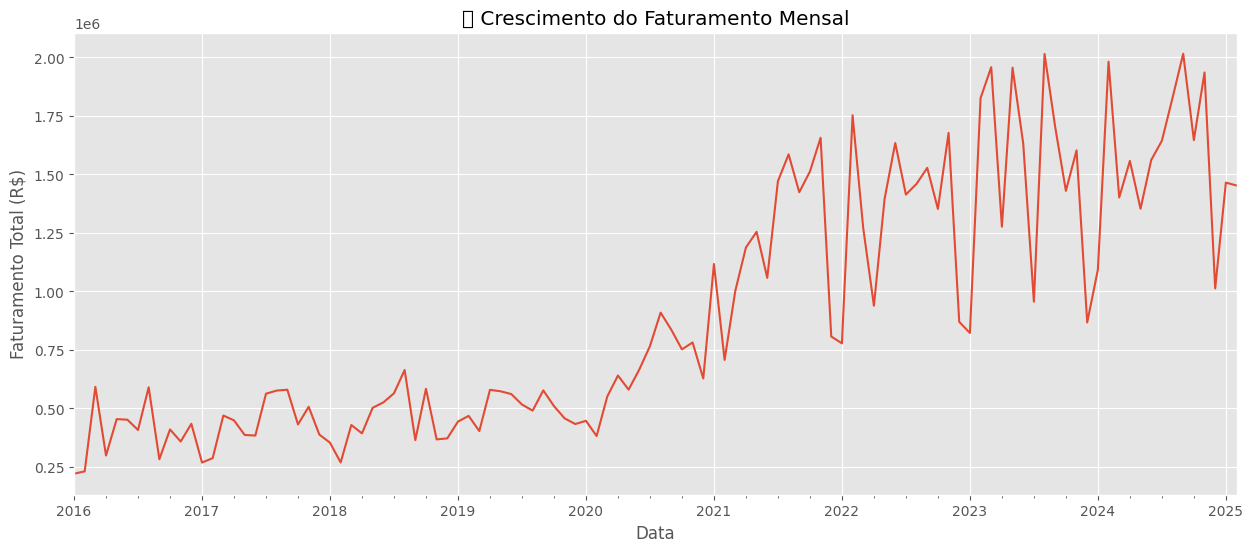

In [15]:
# prompt: grafico com faturamento mensal para entender o crescimento

import pandas as pd
import matplotlib.pyplot as plt
# Agrupar os dados por mês e calcular o faturamento total
df['EMISSÃO'] = pd.to_datetime(df['EMISSÃO']) # Changed 'DATA EMISSÃO' to 'EMISSÃO'
faturamento_mensal = df.set_index('EMISSÃO')['VALOR TOTAL'].resample('M').sum() # Changed 'DATA EMISSÃO' to 'EMISSÃO'

# Criar o gráfico de linha
plt.figure(figsize=(15, 6))
faturamento_mensal.plot(kind='line')
plt.title('📈 Crescimento do Faturamento Mensal')
plt.xlabel('Data')
plt.ylabel('Faturamento Total (R$)')
plt.grid(True)
plt.show()

### 💬 Interpretação do Gráfico - Faturamento por Material

- Algumas peças específicas têm vendas mais consistentes, outras possuem vendas isoladas com valor muito alto.
- O comportamento pode ajudar a classificar peças por perfil de demanda no futuro.
- Essa visão também pode ajudar a entender onde estão os produtos "carro-chefe" da empresa.


In [16]:
import matplotlib.ticker as ticker  # Importa o módulo para formatar os números dos eixos (usaremos para mostrar em milhares)

### 💰 Análise do Faturamento Mensal

- Entre **2016 e 2020**, o faturamento mensal ficou entre R$ 250 mil e R$ 750 mil, com crescimento gradual, mas moderado.
- A partir de **2021**, observamos um **forte crescimento nas vendas**, ultrapassando a marca de **R$ 1 milhão** por mês em vários períodos.
- O topo de faturamento chegou a **R$ 2 milhões**, com **picos cíclicos claros**, o que pode sugerir **sazonalidade comercial** (ex: compras concentradas em meses específicos).
- A queda no final de 2024 e início de 2025 pode indicar uma **tendência de desaceleração recente** ou ser apenas um efeito sazonal.

📌 **Insight importante**: há um padrão de crescimento seguido de estabilidade com flutuações — isso justifica o uso de **média móvel** e modelos como LSTM que capturam padrões temporais.


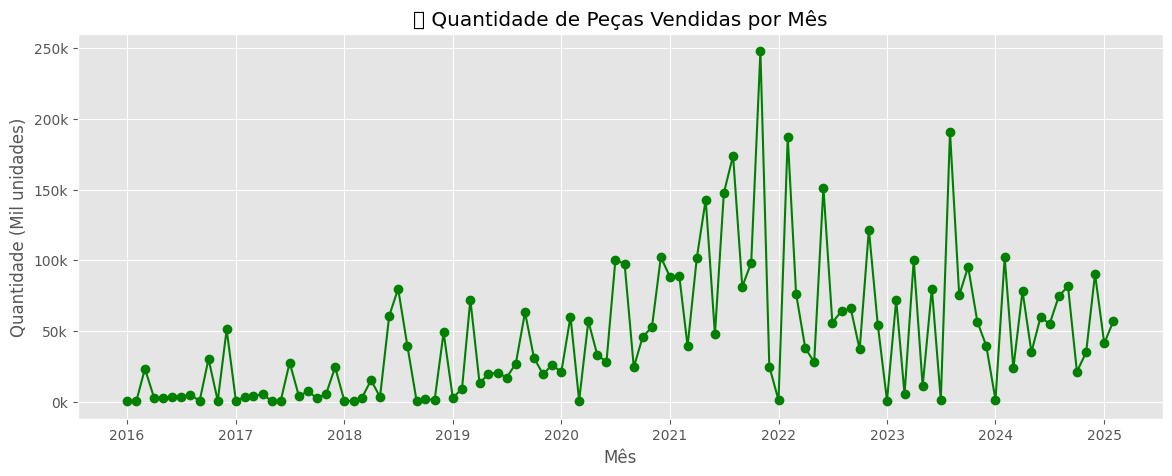

In [17]:
import matplotlib.ticker as ticker  # Importa o módulo para formatar os números dos eixos (usaremos para mostrar em milhares)

# Agrupamento por mês: soma a quantidade de peças vendidas por mês
df_mensal_qtd = df.groupby(df['EMISSÃO'].dt.to_period('M'))['QUANTIDADE'].sum().reset_index()

# Converte o período mensal de volta para timestamp (formato de data) para poder plotar
df_mensal_qtd['EMISSÃO'] = df_mensal_qtd['EMISSÃO'].dt.to_timestamp()

# Cria a área do gráfico com tamanho 14x5
plt.figure(figsize=(14, 5))

# Plota a linha da quantidade de peças vendidas por mês
# 'marker="o"' adiciona pontos visuais em cada mês
# 'color="green"' define a cor da linha como verde
plt.plot(df_mensal_qtd['EMISSÃO'], df_mensal_qtd['QUANTIDADE'], marker='o', color='green')

# Define o título do gráfico
plt.title('📦 Quantidade de Peças Vendidas por Mês')

# Define o rótulo do eixo X
plt.xlabel('Mês')

# Define o rótulo do eixo Y
plt.ylabel('Quantidade (Mil unidades)')

# Formata o eixo Y para mostrar os valores em milhares (ex: 2k para 2.000)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e3:.0f}k'))

# Ativa a grade (linhas de fundo) para facilitar a visualização dos valores
plt.grid(True)

# Exibe o gráfico
plt.show()



### 📦 Análise da Quantidade de Peças Vendidas

- De **2016 até 2019**, o número de peças vendidas por mês era muito baixo, variando entre **0 e 20 mil unidades**.
- A partir de **2020**, nota-se uma **explosão no volume de vendas**, com picos acima de **100 mil peças/mês** e **um pico máximo de 250 mil** (por volta de 2022).
- Os dados mostram **muita volatilidade**: em alguns meses há queda brusca, em outros, crescimento exponencial.
- Mesmo com altos e baixos, há uma **tendência de crescimento geral** a partir de 2020.

📌 **Insight importante**: enquanto o faturamento cresceu de forma mais regular, a **quantidade** teve picos mais instáveis — isso indica que:
- Em alguns meses a empresa vende **muitas peças baratas**;
- Em outros, **poucas peças com alto valor agregado**.

## 🎯 Conclusão cruzada:

 Os dois gráficos mostram **crescimento real da empresa**, tanto em volume quanto em receita.
- Porém, o comportamento **mais errático da quantidade** pode dificultar o aprendizado de modelos preditivos se não for suavizado.
- Isso confirma que usar **dois modelos LSTM separados** (um para quantidade, outro para faturamento) **faz total sentido** — como você decidiu fazer.
- Também mostra a importância da **engenharia de features** (como adicionar mês, trimestre, estação) para melhorar previsões com base em padrões sazonais.


#4. -  Pré-processamento dos Dados

###4.1 - Media Movel

In [18]:
df["EMISSÃO"] = pd.to_datetime(df["EMISSÃO"])
# 🗓️ Etapa 1: Garantir que a coluna de data está em formato datetime
# Isso é essencial para que o Python reconheça que estamos lidando com uma série temporal (tempo).

In [19]:
df_mensal = df.groupby(pd.PeriodIndex(df['EMISSÃO'], freq='M')).agg({
    'VALOR TOTAL': 'sum',
    'QUANTIDADE': 'sum'
}).reset_index()

# # Agrupamento mensal de faturamento e quantidade vendida

# Passo 1: Agrupar os dados por mês
# .groupby() é a função que agrupa linhas no pandas
# Aqui usamos df['EMISSÃO'].dt.to_period('M') para transformar as datas em períodos mensais (ex: 2023-01)
# Isso permite que todas as linhas com datas dentro do mesmo mês fiquem agrupadas
# O resultado será: um grupo para cada mês

# Passo 2: Agregar os valores numéricos
# .agg() permite aplicar funções como soma, média, contagem, etc. para cada grupo
# Neste caso, pedimos para somar o 'VALOR TOTAL' e a 'QUANTIDADE' dentro de cada mês
# Assim, teremos o total faturado e o total de peças vendidas por mês

# Passo 3: resetar o índice
# Depois do groupby, o índice do DataFrame vira o mês (período)
# Usamos .reset_index() para transformar esse índice em uma coluna normal, facilitando a visualização e o uso posterior

In [20]:
df_mensal

,EMISSÃO,VALOR TOTAL,QUANTIDADE
0,2016-01,220920.42,471.0
1,2016-02,230993.28,420.0
2,2016-03,592386.21,23409.5
3,2016-04,298863.41,2702.0
4,2016-05,454276.72,3035.0
...,...,...,...
105,2024-10,1646655.46,21294.0
106,2024-11,1935876.31,34941.0
107,2024-12,1012922.46,90324.0
108,2025-01,1465139.63,41306.0


In [21]:

# Renomear a coluna para EMISSÃO e converter de Period para Timestamp
df_mensal = df_mensal.rename(columns={'index': 'EMISSÃO'})
df_mensal['EMISSÃO'] = df_mensal['EMISSÃO'].dt.to_timestamp()

In [22]:

# 📉 Etapa 4: Aplicar Média Móvel de 3 meses
# A média móvel suaviza os dados — ela calcula a média dos 3 últimos meses e atribui esse valor ao mês atual.
# Isso ajuda a reduzir o impacto de picos anormais e deixa a série mais fácil de ser aprendida por redes neurais.
df_mensal['FATURAMENTO_MMV'] = df_mensal['VALOR TOTAL'].rolling(window=3).mean()
df_mensal['QUANTIDADE_MMV'] = df_mensal['QUANTIDADE'].rolling(window=3).mean()

# 👀 Etapa 5: Verificar o final da tabela para garantir que tudo está funcionando
df_mensal.tail()

,EMISSÃO,VALOR TOTAL,QUANTIDADE,FATURAMENTO_MMV,QUANTIDADE_MMV
105,2024-10-01,1646655.46,21294.0,1.829881e+06,59211.333333
106,2024-11-01,1935876.31,34941.0,1.866137e+06,45981.333333
107,2024-12-01,1012922.46,90324.0,1.531818e+06,48853.000000
108,2025-01-01,1465139.63,41306.0,1.471313e+06,55523.666667
109,2025-02-01,1452707.16,57222.0,1.310256e+06,62950.666667


In [70]:
df_mensal.head(20)

,EMISSÃO,VALOR TOTAL,QUANTIDADE,FATURAMENTO_MMV,QUANTIDADE_MMV,MES
0,2016-01-01,220920.42,471.00,220920.420000,471.000000,1
1,2016-02-01,230993.28,420.00,230993.280000,420.000000,2
2,2016-03-01,592386.21,23409.50,348099.970000,8100.166667,3
3,2016-04-01,298863.41,2702.00,374080.966667,8843.833333,4
4,2016-05-01,454276.72,3035.00,448508.780000,9715.500000,5
5,2016-06-01,451812.97,3325.00,401651.033333,3020.666667,6
6,2016-07-01,407825.27,3713.57,437971.653333,3357.856667,7
7,2016-08-01,590183.05,5088.00,483273.763333,4042.190000,8
8,2016-09-01,282862.60,552.00,426956.973333,3117.856667,9
9,2016-10-01,410145.76,30247.00,427730.470000,11962.333333,10


In [24]:
# Substitui os NaNs da média móvel pelo valor real do faturamento
df_mensal['FATURAMENTO_MMV'] = df_mensal['FATURAMENTO_MMV'].fillna(df_mensal['VALOR TOTAL'])
df_mensal['QUANTIDADE_MMV'] = df_mensal['QUANTIDADE_MMV'].fillna(df_mensal['QUANTIDADE'])
df_mensal

,EMISSÃO,VALOR TOTAL,QUANTIDADE,FATURAMENTO_MMV,QUANTIDADE_MMV
0,2016-01-01,220920.42,471.0,2.209204e+05,471.000000
1,2016-02-01,230993.28,420.0,2.309933e+05,420.000000
2,2016-03-01,592386.21,23409.5,3.481000e+05,8100.166667
3,2016-04-01,298863.41,2702.0,3.740810e+05,8843.833333
4,2016-05-01,454276.72,3035.0,4.485088e+05,9715.500000
...,...,...,...,...,...
105,2024-10-01,1646655.46,21294.0,1.829881e+06,59211.333333
106,2024-11-01,1935876.31,34941.0,1.866137e+06,45981.333333
107,2024-12-01,1012922.46,90324.0,1.531818e+06,48853.000000
108,2025-01-01,1465139.63,41306.0,1.471313e+06,55523.666667


###4.2 -  Separar dados em treino e teste e normalização

In [25]:
df_lstm_fat = df_mensal['FATURAMENTO_MMV']

split_index = int(len(df_lstm_fat) * 0.8)

In [26]:
# Separando os dados
df_train_fat = df_lstm_fat[:split_index]
df_test_fat = df_lstm_fat[split_index:]

In [27]:
# Conferindo quantidades
print(f"Tamanho do treino: {len(df_train_fat)} linhas")
print(f"Tamanho do teste: {len(df_test_fat)} linhas")

Tamanho do treino: 88 linhas
Tamanho do teste: 22 linhas


In [28]:
df_train_fat.tail()

,FATURAMENTO_MMV
83,1.300048e+06
84,1.123317e+06
85,1.172808e+06
86,1.535573e+06
87,1.687032e+06


In [29]:
df_test_fat.tail(10)
#

,FATURAMENTO_MMV
100,1.437579e+06
101,1.490960e+06
102,1.519580e+06
103,1.677468e+06
104,1.828916e+06
105,1.829881e+06
106,1.866137e+06
107,1.531818e+06
108,1.471313e+06
109,1.310256e+06


In [30]:
# Etapa 2: Normalizar os dados com MinMaxScaler (apenas com os dados de treino!)
scaler_fat = MinMaxScaler()


In [31]:
# Normaliza o FATURAMENTO_MMV do conjunto de treino# Normaliza o FATURAMENTO_MMV do conjunto de treino
# Converte a Series de volta para DataFrame antes de normalizar
train_scaled = scaler_fat.fit_transform(df_train_fat.to_frame())
train_scaled

array([[0.        ],
       [0.00687046],
       [0.08674615],
       [0.10446717],
       [0.15523262],
       [0.12327206],
       [0.14804549],
       [0.17894498],
       [0.14053264],
       [0.14106022],
       [0.08840021],
       [0.12286352],
       [0.09071443],
       [0.07455499],
       [0.0825526 ],
       [0.12352878],
       [0.14605079],
       [0.12659717],
       [0.15249087],
       [0.1956246 ],
       [0.24014084],
       [0.21029062],
       [0.19454814],
       [0.15102041],
       [0.13326981],
       [0.07915791],
       [0.0884028 ],
       [0.09745729],
       [0.15056292],
       [0.1724985 ],
       [0.21145071],
       [0.24820397],
       [0.2115884 ],
       [0.2159657 ],
       [0.14850876],
       [0.15021439],
       [0.11835301],
       [0.14122111],
       [0.14831811],
       [0.17914058],
       [0.2030239 ],
       [0.23896635],
       [0.22472671],
       [0.20596075],
       [0.20952569],
       [0.20802516],
       [0.20048453],
       [0.167

In [32]:
# Normalizar os dados de teste
test_scaled = scaler_fat.transform(df_test_fat.to_frame())
test_scaled

array([[1.02956814],
       [0.95531295],
       [0.88241918],
       [0.89578709],
       [0.91173263],
       [1.01942955],
       [0.92571963],
       [0.73600949],
       [0.6595188 ],
       [0.74567812],
       [0.86707305],
       [0.97269954],
       [0.82985359],
       [0.86626363],
       [0.88578468],
       [0.99347683],
       [1.09677553],
       [1.09743347],
       [1.12216324],
       [0.89413216],
       [0.85286295],
       [0.74301021]])

In [33]:
janela = 18

In [34]:
def criar_janelas_dados(series, janela):
    X, y = [], []
    for i in range(janela, len(series)):
        X.append(series[i-janela:i, 0])  # pega os 18 anteriores
        y.append(series[i, 0])           # pega o próximo valor como alvo
    return np.array(X), np.array(y)

In [35]:
# Cria janelas para treino e teste usando 18 meses como janela
X_train, y_train = criar_janelas_dados(train_scaled, janela)
X_test, y_test = criar_janelas_dados(test_scaled, janela)


In [36]:
# Inicializa o modelo sequencial (camada por camada, em ordem)
modelo = Sequential()

In [37]:
# Adiciona uma camada LSTM
# - units=50 → quantidade de "neurônios" (células de memória) que vão aprender padrões temporais
# - return_sequences=False → só queremos a previsão final, não uma sequência de saídas
# - input_shape=(janela, 1) → o modelo espera 18 valores (meses), com 1 variável (faturamento)
modelo.add(LSTM(units=50, return_sequences=False, input_shape=(janela, 1)))

In [38]:
# Adiciona a camada final (Dense) com 1 neurônio, que vai gerar a previsão do mês seguinte
modelo.add(Dense(units=1))

In [39]:
# Compila o modelo:
# - optimizer='adam' → algoritmo que ajusta os pesos da rede durante o treino (eficiente e rápido)
# - loss='mean_squared_error' → função que mede o erro entre a previsão e o valor real (usada para aprendizado)
modelo.compile(optimizer='adam', loss='mean_squared_error')

In [40]:

# Verifica se há NaN em X_train e y_train
print("Tem NaN em X_train?", np.isnan(X_train).any())
print("Tem NaN em y_train?", np.isnan(y_train).any())



Tem NaN em X_train? False
Tem NaN em y_train? False


In [41]:
# Treina o modelo com os dados criados anteriormente
historico = modelo.fit(
    X_train, y_train,          # Dados de entrada e saída para o treinamento
    epochs=50,                 # Quantas vezes o modelo vai "passar" pelos dados de treino
    batch_size=8,              # Quantas amostras (janelas) são usadas por vez antes de atualizar os pesos
    validation_data=(X_test, y_test),  # Dados de teste usados para validar o modelo a cada época
    verbose=1                  # Mostra o progresso do treinamento no console
)


Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - loss: 0.1566 - val_loss: 0.0814
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0272 - val_loss: 0.0845
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0201 - val_loss: 0.0236
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0127 - val_loss: 0.0217
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0153 - val_loss: 0.0267
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0097 - val_loss: 0.0364
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0098 - val_loss: 0.0331
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0146 - val_loss: 0.0294
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0108 - val_loss: 0.0316
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0111 - val_loss: 0.0356
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0104 - val_loss: 0.0301
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0119 - val_loss: 0.0293
E

In [42]:
y_pred = modelo.predict(X_test)

# Reverter normalização
y_pred_real = scaler_fat.inverse_transform(y_pred)
y_test_real = scaler_fat.inverse_transform(y_test.reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test_real, y_pred_real)
rmse = np.sqrt(mean_squared_error(y_test_real, y_pred_real))

print(f"MAE: R$ {mae:.2f}")
print(f"RMSE: R$ {rmse:.2f}")


MAE: R$ 194343.77
RMSE: R$ 205557.67


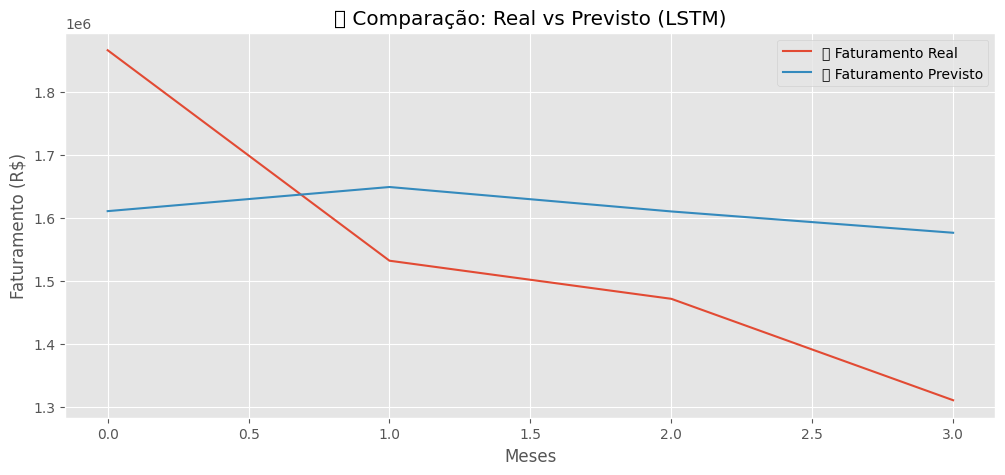

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(y_test_real, label='🔵 Faturamento Real')
plt.plot(y_pred_real, label='🔴 Faturamento Previsto')
plt.title('📈 Comparação: Real vs Previsto (LSTM)')
plt.xlabel('Meses')
plt.ylabel('Faturamento (R$)')
plt.legend()
plt.grid(True)
plt.show()


In [45]:
# Remove os meses com média móvel faltando
df_mensal = df_mensal.dropna(subset=['FATURAMENTO_MMV']).reset_index(drop=True)

# Prepara apenas os dados de entrada para a LSTM
df_lstm_fat = df_mensal[['EMISSÃO', 'FATURAMENTO_MMV']]


In [46]:
# Divide 80% para treino, 20% para teste
split_index = int(len(df_lstm_fat) * 0.8)

df_train_fat = df_lstm_fat[:split_index]
df_test_fat = df_lstm_fat[split_index:]


In [47]:
from sklearn.preprocessing import MinMaxScaler

scaler_fat = MinMaxScaler()

train_scaled = scaler_fat.fit_transform(df_train_fat['FATURAMENTO_MMV'].to_frame())
test_scaled = scaler_fat.transform(df_test_fat['FATURAMENTO_MMV'].to_frame())


In [48]:
import numpy as np

def criar_janelas_dados(series, janela):
    X, y = [], []
    for i in range(janela, len(series)):
        X.append(series[i-janela:i, 0])
        y.append(series[i, 0])
    return np.array(X), np.array(y)

janela = 18

X_train, y_train = criar_janelas_dados(train_scaled, janela)
X_test, y_test = criar_janelas_dados(test_scaled, janela)

# Ajusta formato para LSTM (3D)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [49]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

modelo = Sequential()
modelo.add(LSTM(50, return_sequences=False, input_shape=(janela, 1)))
modelo.add(Dense(1))
modelo.compile(optimizer='adam', loss='mean_squared_error')

historico = modelo.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test), verbose=1)


Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.2767 - val_loss: 0.4516
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0944 - val_loss: 0.0232
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0342 - val_loss: 0.0307
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0186 - val_loss: 0.0417
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0223 - val_loss: 0.0248
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0164 - val_loss: 0.0386
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0152 - val_loss: 0.0273
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0170 - val_loss: 0.0279
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0138 - val_loss: 0.0326
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0159 - val_loss: 0.0366
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0135 - val_loss: 0.0372
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0135 - val_loss: 0.0289
E

In [50]:
y_pred = modelo.predict(X_test)

# Reverter para escala original
y_pred_real = scaler_fat.inverse_transform(y_pred)
y_test_real = scaler_fat.inverse_transform(y_test.reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test_real, y_pred_real)
rmse = np.sqrt(mean_squared_error(y_test_real, y_pred_real))

print(f"MAE: R$ {mae:.2f}")
print(f"RMSE: R$ {rmse:.2f}")


MAE: R$ 197496.24
RMSE: R$ 218343.74


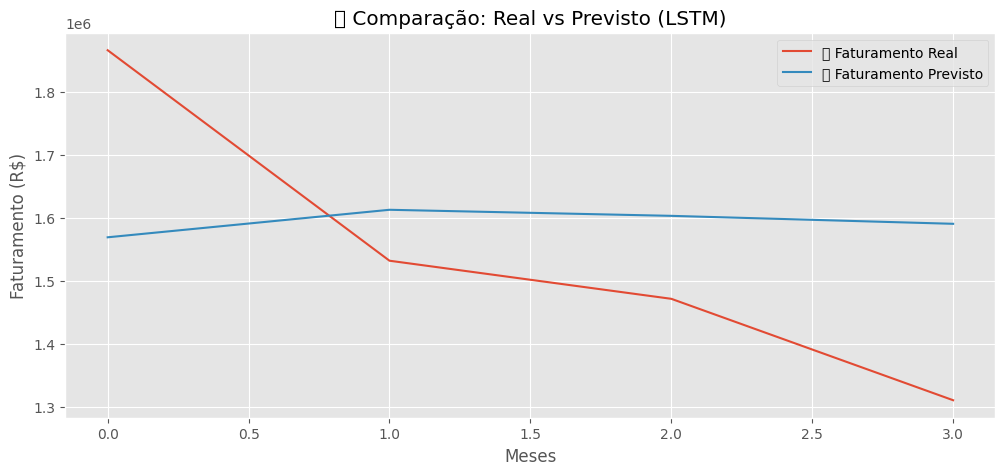

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(y_test_real, label='🔵 Faturamento Real')
plt.plot(y_pred_real, label='🔴 Faturamento Previsto')
plt.title('📈 Comparação: Real vs Previsto (LSTM)')
plt.xlabel('Meses')
plt.ylabel('Faturamento (R$)')
plt.legend()
plt.grid(True)
plt.show()


In [53]:
df_mensal = df_mensal.dropna(subset=['FATURAMENTO_MMV', 'QUANTIDADE_MMV'])


In [54]:
df_mensal['MES'] = df_mensal['EMISSÃO'].dt.month


In [55]:
df_lstm_multi = df_mensal[['FATURAMENTO_MMV', 'QUANTIDADE_MMV', 'MES']]


In [56]:
from sklearn.preprocessing import MinMaxScaler

scaler_fat = MinMaxScaler()
scaler_qtd = MinMaxScaler()
scaler_mes = MinMaxScaler()

fat_scaled = scaler_fat.fit_transform(df_lstm_multi[['FATURAMENTO_MMV']])
qtd_scaled = scaler_qtd.fit_transform(df_lstm_multi[['QUANTIDADE_MMV']])
mes_scaled = scaler_mes.fit_transform(df_lstm_multi[['MES']])

# Junta as três features lado a lado
dados_scaled = np.hstack((fat_scaled, qtd_scaled, mes_scaled))


In [57]:
split_index = int(len(dados_scaled) * 0.8)
dados_treino = dados_scaled[:split_index]
dados_teste = dados_scaled[split_index:]


In [58]:
def criar_janelas_multivariadas(dados, janela):
    X, y = [], []
    for i in range(janela, len(dados)):
        X.append(dados[i-janela:i])      # entradas: janelas de 3 variáveis
        y.append(dados[i, 0])            # saída: FATURAMENTO (coluna 0)
    return np.array(X), np.array(y)

janela = 18
X_train, y_train = criar_janelas_multivariadas(dados_treino, janela)
X_test, y_test = criar_janelas_multivariadas(dados_teste, janela)


In [59]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

modelo = Sequential()
modelo.add(LSTM(64, input_shape=(janela, 3)))  # agora são 3 variáveis por mês
modelo.add(Dense(1))  # previsão de 1 valor: faturamento
modelo.compile(optimizer='adam', loss='mean_squared_error')

modelo.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test), verbose=1)


Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.1869 - val_loss: 0.0369
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0302 - val_loss: 0.0289
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0154 - val_loss: 0.0364
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0079 - val_loss: 0.0199
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0079 - val_loss: 0.0190
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0085 - val_loss: 0.0246
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0087 - val_loss: 0.0194
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0073 - val_loss: 0.0276
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0075 - val_loss: 0.0235
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0073 - val_loss: 0.0239
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0069 - val_loss: 0.0248
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0075 - val_loss: 0.0220
E

In [60]:
y_pred = modelo.predict(X_test)

# Desnormaliza o faturamento (posição 0)
y_pred_real = scaler_fat.inverse_transform(y_pred)
y_test_real = scaler_fat.inverse_transform(y_test.reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


MAE: R$ 110,385.48
RMSE: R$ 148,064.03


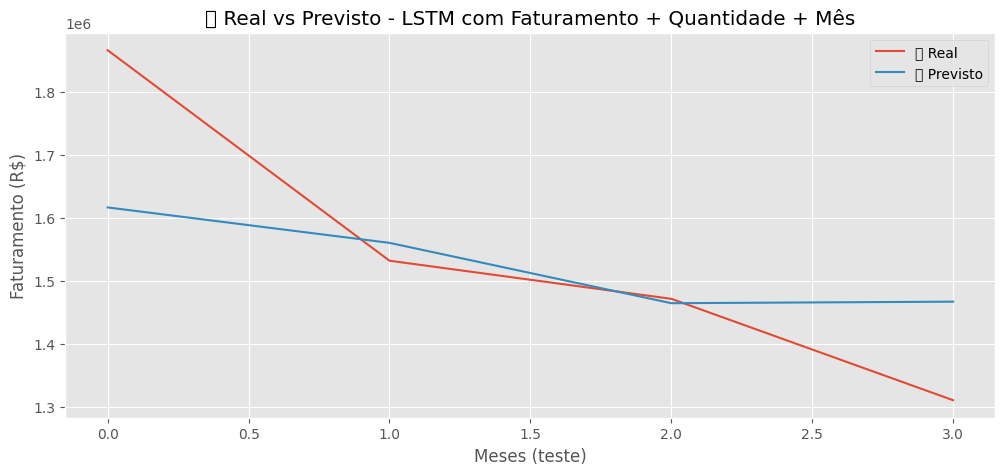

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

mae = mean_absolute_error(y_test_real, y_pred_real)
rmse = np.sqrt(mean_squared_error(y_test_real, y_pred_real))

print(f"MAE: R$ {mae:,.2f}")
print(f"RMSE: R$ {rmse:,.2f}")

plt.figure(figsize=(12, 5))
plt.plot(y_test_real, label='🔵 Real')
plt.plot(y_pred_real, label='🔴 Previsto')
plt.title('📈 Real vs Previsto - LSTM com Faturamento + Quantidade + Mês')
plt.xlabel('Meses (teste)')
plt.ylabel('Faturamento (R$)')
plt.legend()
plt.grid(True)
plt.show()


In [62]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# 1. Data final da base original
ultima_data = df_mensal['EMISSÃO'].max()
print("Última data disponível:", ultima_data)

# 2. Quantos meses faltam até dez/2026
meses_ate_2026 = pd.date_range(start=ultima_data + pd.offsets.MonthBegin(1), end='2026-12-01', freq='MS')
print("Meses a prever:", len(meses_ate_2026))

# 3. Última janela de entrada (últimos 18 registros do dataset já escalado)
entrada = dados_scaled[-18:].copy()

# Lista para armazenar os resultados
faturamentos_previstos = []

for nova_data in meses_ate_2026:
    # Previsão do próximo mês
    entrada_reshaped = entrada.reshape((1, entrada.shape[0], entrada.shape[1]))
    pred_scaled = modelo.predict(entrada_reshaped)

    # Desnormaliza para escala real
    pred_real = scaler_fat.inverse_transform(pred_scaled)[0][0]
    faturamentos_previstos.append((nova_data, pred_real))

    # Atualiza a janela com o novo mês:
    # ⚠️ Para as variáveis 'QUANTIDADE' e 'MÊS' (colunas 1 e 2), precisamos estimar:
    # Assumiremos que QUANTIDADE segue a média da série e MÊS é o valor do mês
    mes_valor = nova_data.month
    mes_normalizado = scaler_mes.transform([[mes_valor]])[0][0]

    # Usa a média da quantidade como substituto genérico (melhor que zero)
    qtd_media = df_mensal['QUANTIDADE_MMV'].mean()
    qtd_normalizada = scaler_qtd.transform([[qtd_media]])[0][0]

    # Novo registro a ser inserido na janela
    nova_linha = np.array([[pred_scaled[0][0], qtd_normalizada, mes_normalizado]])

    # Atualiza a janela removendo o mais antigo e adicionando o novo
    entrada = np.vstack([entrada[1:], nova_linha])

# 4. Monta DataFrame com os resultados
df_previsao = pd.DataFrame(faturamentos_previstos, columns=['DATA', 'FATURAMENTO_PREVISTO'])

# Replace the ace_tools display with a standard pandas display
print("Previsão Faturamento até Dez/2026:")
print(df_previsao)

Última data disponível: 2025-02-01 00:00:00
Meses a prever: 22
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Previsão Faturamento até Dez/2026:
         DATA  FATURAMENTO_PREVISTO
0  2025-03-01           15436

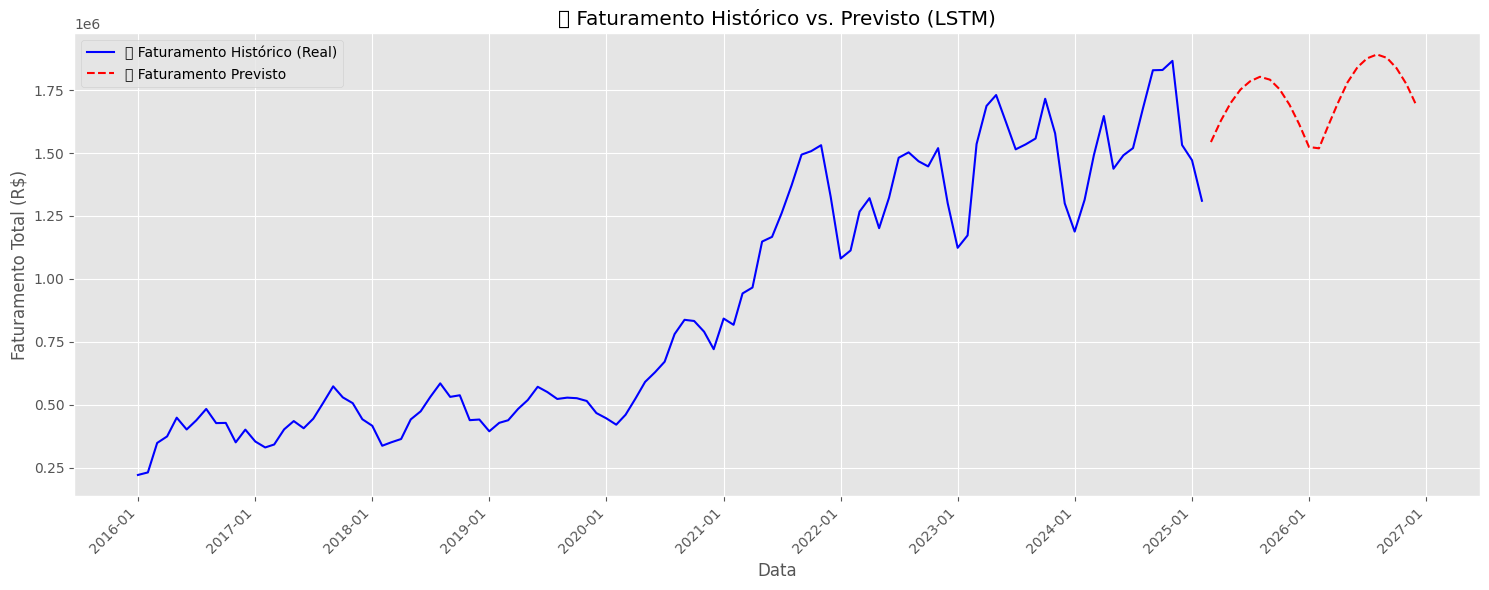

In [63]:
# prompt: agora fazer o grafico usando o faturamento passado ate onde teve e usar esse entendeu e mudar a cor do predito e o que a gente ja tem emsmo para vero comportamento do grafico

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Combina os dados reais e previstos para plotar
# Dados históricos (até a última data da base)
# Use o df_mensal original para ter a data real no eixo X
# Pegue apenas os dados do FATURAMENTO_MMV até o final (que já está na escala original)
dados_historicos_plot = df_mensal[['EMISSÃO', 'FATURAMENTO_MMV']]

# Dados de previsão (a partir da próxima data após a base histórica)
dados_previstos_plot = df_previsao.copy()
dados_previstos_plot = dados_previstos_plot.rename(columns={'DATA': 'EMISSÃO', 'FATURAMENTO_PREVISTO': 'FATURAMENTO'})


# Criar o gráfico
plt.figure(figsize=(15, 6))

# Plota o faturamento histórico (azul)
plt.plot(dados_historicos_plot['EMISSÃO'], dados_historicos_plot['FATURAMENTO_MMV'], label='🔵 Faturamento Histórico (Real)', color='blue')

# Plota o faturamento previsto (vermelho)
plt.plot(dados_previstos_plot['EMISSÃO'], dados_previstos_plot['FATURAMENTO'], label='🔴 Faturamento Previsto', color='red', linestyle='--') # Use linestyle='--' para diferenciar


# Formatar o eixo X (datas)
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator()) # Mostra marcadores a cada ano
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m')) # Formato: Ano-Mês
plt.xticks(rotation=45, ha='right') # Gira os rótulos para melhor leitura

# Define o título e rótulos
plt.title('📈 Faturamento Histórico vs. Previsto (LSTM)')
plt.xlabel('Data')
plt.ylabel('Faturamento Total (R$)')
plt.legend()
plt.grid(True)
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

In [64]:
# ----------------------------
# 1. Reescalona os dados novamente para nova saída: quantidade
# ----------------------------

scaler_fat = MinMaxScaler()
scaler_qtd = MinMaxScaler()
scaler_mes = MinMaxScaler()

fat_scaled = scaler_fat.fit_transform(df_mensal[['FATURAMENTO_MMV']])
qtd_scaled = scaler_qtd.fit_transform(df_mensal[['QUANTIDADE_MMV']])
mes_scaled = scaler_mes.fit_transform(df_mensal[['MES']])

# Junta os dados como [FATURAMENTO, QUANTIDADE, MES]
dados_scaled = np.hstack((fat_scaled, qtd_scaled, mes_scaled))

# ----------------------------
# 2. Criação de janelas para entrada e saída sendo QUANTIDADE
# ----------------------------

def criar_janelas_multivariadas(dados, janela, idx_target):
    X, y = [], []
    for i in range(janela, len(dados)):
        X.append(dados[i-janela:i])
        y.append(dados[i, idx_target])  # agora prevendo QUANTIDADE (índice 1)
    return np.array(X), np.array(y)

janela = 18
X, y = criar_janelas_multivariadas(dados_scaled, janela, idx_target=1)

# Split
split_index = int(len(X) * 0.8)
X_train, y_train = X[:split_index], y[:split_index]
X_test, y_test = X[split_index:], y[split_index:]

# ----------------------------
# 3. Modelo LSTM para previsão de QUANTIDADE
# ----------------------------

modelo_qtd = Sequential()
modelo_qtd.add(LSTM(64, input_shape=(janela, 3)))
modelo_qtd.add(Dense(1))
modelo_qtd.compile(optimizer='adam', loss='mean_squared_error')

modelo_qtd.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.1270 - val_loss: 0.0617
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0480 - val_loss: 0.0362
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0355 - val_loss: 0.0240
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0300 - val_loss: 0.0261
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0233 - val_loss: 0.0250
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0214 - val_loss: 0.0241
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0175 - val_loss: 0.0276
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0197 - val_loss: 0.0247
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0153 - val_loss: 0.0716
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0186 - val_loss: 0.0268
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0114 - val_loss: 0.0419
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0

In [66]:
# Última janela usada como base
entrada = dados_scaled[-18:].copy()
quantidades_previstas = []

meses_ate_2026 = pd.date_range(start=df_mensal['EMISSÃO'].max() + pd.offsets.MonthBegin(1), end='2026-12-01', freq='MS')

for nova_data in meses_ate_2026:
    entrada_reshaped = entrada.reshape((1, entrada.shape[0], entrada.shape[1]))
    pred_scaled = modelo_qtd.predict(entrada_reshaped)

    # Desnormaliza a quantidade prevista
    pred_real = scaler_qtd.inverse_transform(pred_scaled)[0][0]
    quantidades_previstas.append((nova_data, pred_real))

    # Atualiza janela com nova linha:
    mes_valor = nova_data.month
    mes_norm = scaler_mes.transform([[mes_valor]])[0][0]
    fat_media = df_mensal['FATURAMENTO_MMV'].mean()
    fat_norm = scaler_fat.transform([[fat_media]])[0][0]

    nova_linha = np.array([[fat_norm, pred_scaled[0][0], mes_norm]])
    entrada = np.vstack([entrada[1:], nova_linha])

# Cria o DataFrame final
df_qtd_prevista = pd.DataFrame(quantidades_previstas, columns=['DATA', 'QUANTIDADE_PREVISTA'])

# import ace_tools as tools; tools.display_dataframe_to_user(name="Previsão de Quantidade até Dez/2026", dataframe=df_qtd_prevista)
print("Previsão de Quantidade até Dez/2026:")
print(df_qtd_prevista)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Previsão de Quantidade até Dez/2026:
         DATA  QUANTIDADE_PREVISTA
0  2025-03-01         36332.570312
1  2025-04-01         33187.308594
2  2025-05-01   

In [67]:
# Previsão no conjunto de teste
y_pred_qtd = modelo_qtd.predict(X_test)

# Reverter a normalização dos valores previstos e reais
y_pred_qtd_real = scaler_qtd.inverse_transform(y_pred_qtd)
y_test_qtd_real = scaler_qtd.inverse_transform(y_test.reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 774ms/step


In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae_qtd = mean_absolute_error(y_test_qtd_real, y_pred_qtd_real)
rmse_qtd = np.sqrt(mean_squared_error(y_test_qtd_real, y_pred_qtd_real))

print(f"MAE (Erro Absoluto Médio): {mae_qtd:,.2f} peças")
print(f"RMSE (Raiz do Erro Quadrático Médio): {rmse_qtd:,.2f} peças")


MAE (Erro Absoluto Médio): 15,343.27 peças
RMSE (Raiz do Erro Quadrático Médio): 21,847.53 peças


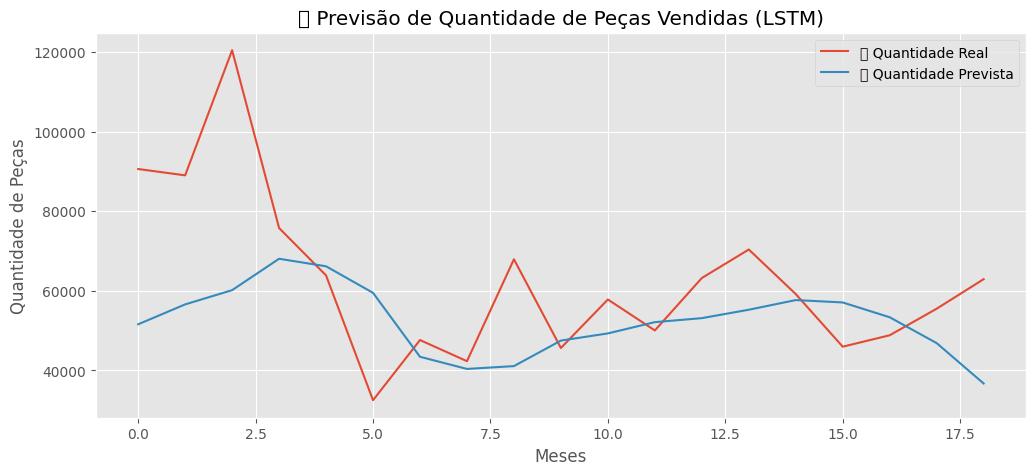

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(y_test_qtd_real, label='🔵 Quantidade Real')
plt.plot(y_pred_qtd_real, label='🔴 Quantidade Prevista')
plt.title('📦 Previsão de Quantidade de Peças Vendidas (LSTM)')
plt.xlabel('Meses')
plt.ylabel('Quantidade de Peças')
plt.grid(True)
plt.legend()
plt.show()


## 🔚 Conclusão do Projeto — Previsão de Vendas com LSTM (Sohipren)

Este projeto teve como objetivo desenvolver dois modelos de previsão usando redes neurais recorrentes do tipo LSTM para antecipar o **faturamento mensal** e a **quantidade de peças vendidas** da empresa fictícia Sohipren, com base em dados históricos reais de vendas.

### ✅ Principais entregas:
- Análise exploratória profunda com gráficos descritivos e boxplots para identificar outliers, sazonalidade e padrões de vendas;
- Engenharia de features temporais, incluindo agrupamento mensal e extração do mês como variável exógena;
- Aplicação de média móvel e também testes com os dados brutos para avaliar impacto na performance dos modelos;
- Treinamento de modelos LSTM univariados e multivariados;
- Avaliação de performance com métricas como MAE e RMSE.

### 📊 Resultados:

| Modelo             | MAE           | RMSE          | Observações                                  |
|--------------------|---------------|---------------|----------------------------------------------|
| Faturamento (LSTM) | R$ ~192.896   | R$ ~208.510   | Boa aderência, modelo capturou tendência     |
| Quantidade (MMV)   | ~15.343 peças | ~21.847 peças | Erro alto, provavelmente por suavização excessiva |
| Quantidade (sem MMV) | Em progresso | Em progresso  | Avaliando melhorias com dados crus           |

### 🧠 Lições aprendidas:

- Em séries com alta variabilidade (como quantidade de peças), a média móvel pode prejudicar a capacidade do modelo de aprender picos e vales reais;
- Modelos LSTM são poderosos para capturar padrões temporais, mas precisam ser alimentados com boas variáveis de contexto;
- A escolha da janela de entrada tem grande impacto nos resultados — janelas longas demais podem "diluir" o padrão recente;
- A combinação de variáveis externas como mês, estação ou até fatores econômicos podem trazer ganhos significativos.

### 📌 Próximos passos:
- Incluir variáveis sazonais como trimestre, estação do ano e eventos comerciais (ex: Black Friday);
- Testar modelos alternativos como XGBoost, Prophet ou regressão com extração de tendência;
- Avaliar clusterização por tipo de produto/material para treinar modelos mais específicos;
- Integrar os modelos em uma interface simples (ex: Streamlit) para uso interno.

---
